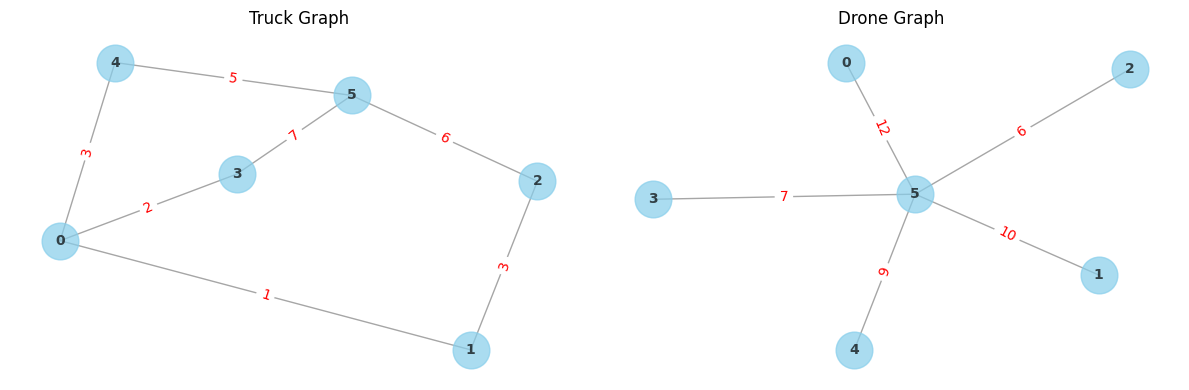

Total cost (Combined): 8
Minimum cost path (Combined): [0, 4, 5]
Path covered by truck in combined graph:
Edge: (0, 4), Weight (Truck): 3
Edge: (4, 5), Weight (Truck): 5
Path covered by drone in combined graph:


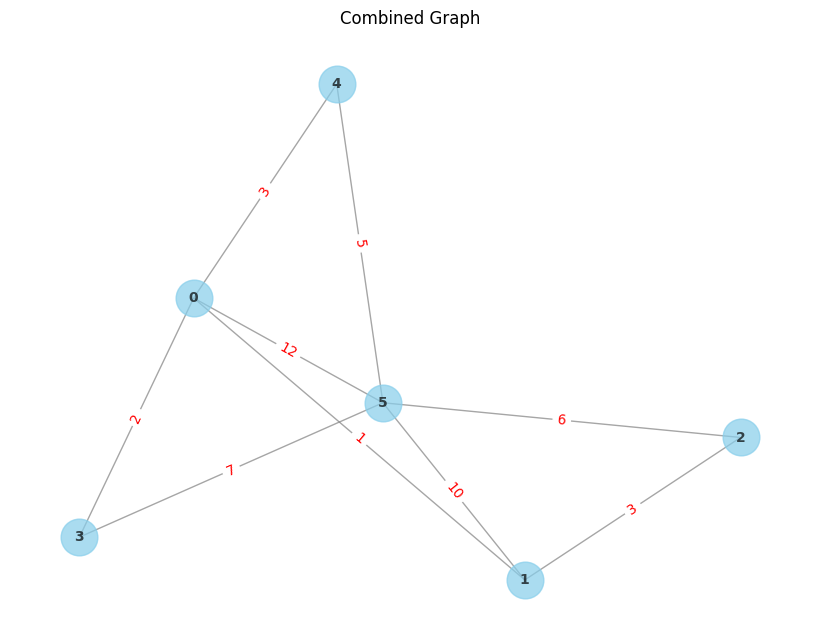

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 9), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# Create truck graph
truck_G = nx.Graph()
truck_G.add_weighted_edges_from(truck_path_edges)

# Create drone graph
drone_G = nx.Graph()
drone_G.add_weighted_edges_from(drone_path_edges)

# Combine the graphs, resolving common edges with minimum weight
combined_G = nx.Graph()
for edge in set(truck_G.edges).union(drone_G.edges):
    if edge in truck_G.edges and edge in drone_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        min_weight = min(weight_truck, weight_drone)
        combined_G.add_edge(edge[0], edge[1], weight=min_weight)
    elif edge in truck_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=truck_G[edge[0]][edge[1]]['weight'])
    elif edge in drone_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=drone_G[edge[0]][edge[1]]['weight'])

# Plot individual truck graph
plt.figure(figsize=(12, 4))
plt.subplot(121)
pos_truck = nx.spring_layout(truck_G)
nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
plt.title("Truck Graph")

# Plot individual drone graph
plt.subplot(122)
pos_drone = nx.spring_layout(drone_G)
nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
plt.title("Drone Graph")

plt.tight_layout()
plt.show()

# Plot the combined graph
plt.figure(figsize=(8, 6))
pos_combined = nx.spring_layout(combined_G)
nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
plt.title("Combined Graph")

# Calculate the total cost of the combined graph
total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=5, weight='weight')
print("Total cost (Combined):", total_cost_combined)

# Find and print the minimum cost path in the combined graph
min_cost_path_combined = nx.shortest_path(combined_G, source=0, target=5, weight='weight')
print("Minimum cost path (Combined):", min_cost_path_combined)

truck_path_combined = []
for i in range(len(min_cost_path_combined) - 1):
    edge = (min_cost_path_combined[i], min_cost_path_combined[i + 1])
    if edge in truck_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_truck == weight_combined:
            truck_path_combined.append((edge, weight_truck))

print("Path covered by truck in combined graph:")
for (edge, weight) in truck_path_combined:
    print(f"Edge: {edge}, Weight (Truck): {weight}")

drone_path_combined = []
for i in range(len(min_cost_path_combined) - 1):
    edge = (min_cost_path_combined[i], min_cost_path_combined[i + 1])
    if edge in drone_G.edges:
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_drone == weight_combined:
            drone_path_combined.append((edge, weight_drone))

print("Path covered by drone in combined graph:")
for (edge, weight) in drone_path_combined:
    print(f"Edge: {edge}, Weight (Drone): {weight}")

plt.show()

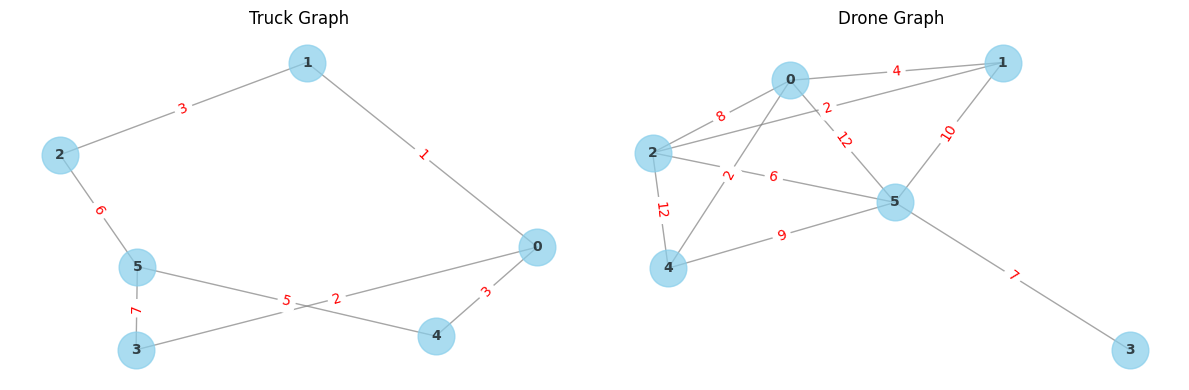

Total cost (Combined): 8
Minimum cost path (Combined 0->2): [0, 1, 2]
Minimum cost path (Combined 2->4): [2, 1, 0, 4]
Path covered by truck in combined graph:
Edge: (0, 1), Weight (Truck): 1
Edge: (1, 0), Weight (Truck): 1
Path covered by drone in combined graph:
Edge: (1, 2), Weight (Drone): 2
Edge: (2, 1), Weight (Drone): 2
Edge: (0, 4), Weight (Drone): 2


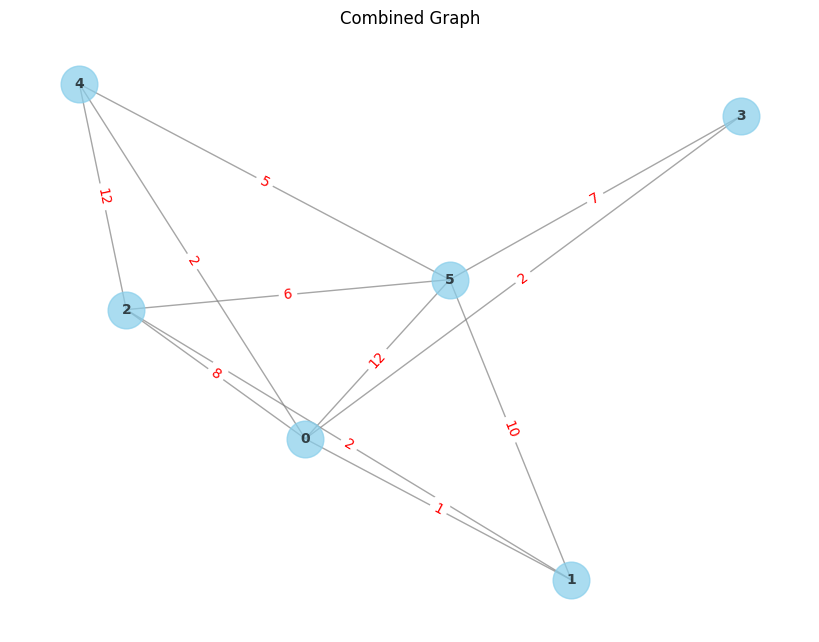

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges for each path considering multiple final destinations
truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
drone_path_edges = [(0, 5, 12), (4, 5, 9), (3, 5, 7), (1, 5, 10), (2, 5, 6),(0,4,2),(0,1,4),(2,4,12),(0,2,6)]

# Create truck graph
truck_G = nx.Graph()
truck_G.add_weighted_edges_from(truck_path_edges)

# Create drone graph
drone_G = nx.Graph()
drone_G.add_weighted_edges_from(drone_path_edges)

# Combine the graphs, resolving common edges with minimum weight
combined_G = nx.Graph()
for edge in set(truck_G.edges).union(drone_G.edges):
    if edge in truck_G.edges and edge in drone_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        min_weight = min(weight_truck, weight_drone)
        combined_G.add_edge(edge[0], edge[1], weight=min_weight)
    elif edge in truck_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=truck_G[edge[0]][edge[1]]['weight'])
    elif edge in drone_G.edges:
        combined_G.add_edge(edge[0], edge[1], weight=drone_G[edge[0]][edge[1]]['weight'])

# Plot individual truck graph
plt.figure(figsize=(12, 4))
plt.subplot(121)
pos_truck = nx.spring_layout(truck_G)
nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
plt.title("Truck Graph")

# Plot individual drone graph
plt.subplot(122)
pos_drone = nx.spring_layout(drone_G)
nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
plt.title("Drone Graph")

plt.tight_layout()
plt.show()

# Plot the combined graph
plt.figure(figsize=(8, 6))
pos_combined = nx.spring_layout(combined_G)
nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
plt.title("Combined Graph")

# Calculate the total cost of the combined graph
total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=2, weight='weight') + nx.shortest_path_length(combined_G, source=2, target=4, weight='weight')
print("Total cost (Combined):", total_cost_combined)

# Find and print the minimum cost path in the combined graph
min_cost_path_combined_02 = nx.shortest_path(combined_G, source=0, target=2, weight='weight')
min_cost_path_combined_24 = nx.shortest_path(combined_G, source=2, target=4, weight='weight')
print("Minimum cost path (Combined 0->2):", min_cost_path_combined_02)
print("Minimum cost path (Combined 2->4):", min_cost_path_combined_24)

# Determine which path the truck will cover
truck_path_combined = []
for i in range(len(min_cost_path_combined_02) - 1):
    edge = (min_cost_path_combined_02[i], min_cost_path_combined_02[i + 1])
    if edge in truck_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_truck == weight_combined:
            truck_path_combined.append((edge, weight_truck))

for i in range(len(min_cost_path_combined_24) - 1):
    edge = (min_cost_path_combined_24[i], min_cost_path_combined_24[i + 1])
    if edge in truck_G.edges:
        weight_truck = truck_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_truck == weight_combined:
            truck_path_combined.append((edge, weight_truck))

print("Path covered by truck in combined graph:")
for (edge, weight) in truck_path_combined:
    print(f"Edge: {edge}, Weight (Truck): {weight}")

# Determine which path the drone will cover
drone_path_combined = []
# if min_cost_path_combined_02[-1] == min_cost_path_combined_24[0]:
    # Truck and drone meet at the common node, drone takes over from there
for i in range(len(min_cost_path_combined_02) - 1):
    edge = (min_cost_path_combined_02[i], min_cost_path_combined_02[i + 1])
    if edge in drone_G.edges:
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_drone == weight_combined:
            drone_path_combined.append((edge, weight_drone))

for i in range(len(min_cost_path_combined_24) - 1):
    edge = (min_cost_path_combined_24[i], min_cost_path_combined_24[i + 1])
    if edge in drone_G.edges:
        weight_drone = drone_G[edge[0]][edge[1]]['weight']
        weight_combined = combined_G[edge[0]][edge[1]]['weight']
        if weight_drone == weight_combined:
            drone_path_combined.append((edge, weight_drone))
# else:
    # Truck and drone meet at different nodes, drone starts from the last node of truck's path


print("Path covered by drone in combined graph:")
for (edge, weight) in drone_path_combined:
    print(f"Edge: {edge}, Weight (Drone): {weight}")

plt.show()


In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
# drone_path_edges = [(0, 5, 12), (4, 5, 5), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# # Create truck graph
# truck_G = nx.Graph()
# truck_G.add_weighted_edges_from(truck_path_edges)

# # Create drone graph
# drone_G = nx.Graph()
# drone_G.add_weighted_edges_from(drone_path_edges)

# # Plot individual truck graph
# plt.figure(figsize=(12, 4))
# plt.subplot(121)
# pos_truck = nx.spring_layout(truck_G)
# nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
# nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
# plt.title("Truck Graph")

# # Plot individual drone graph
# plt.subplot(122)
# pos_drone = nx.spring_layout(drone_G)
# nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
# nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
# plt.title("Drone Graph")

# plt.tight_layout()
# plt.show()

# # Plot the combined graph
# combined_G = nx.compose(truck_G, drone_G)
# plt.figure(figsize=(8, 6))
# pos_combined = nx.spring_layout(combined_G)
# nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
# nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
# plt.title("Combined Graph")

# # Calculate the total cost of the combined graph
# total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=5, weight='weight')
# print("Total cost (Combined):", total_cost_combined)

# # Find and print the minimum cost path in the combined graph
# min_cost_path_combined = nx.shortest_path(combined_G, source=0, target=5, weight='weight')
# print("Minimum cost path (Combined):", min_cost_path_combined)

# # Extract the edges and their weights for the truck path in the combined graph
# truck_path_edges_combined = [(min_cost_path_combined[i], min_cost_path_combined[i + 1]) for i in range(len(min_cost_path_combined) - 1)]
# truck_path_weights_combined = [combined_G[min_cost_path_combined[i]][min_cost_path_combined[i + 1]]['weight'] for i in range(len(min_cost_path_combined) - 1)]

# # Print the truck path and its weights
# print("Truck Path in Combined Graph:")
# for edge, weight in zip(truck_path_edges_combined, truck_path_weights_combined):
#     print(f"Edge: {edge}, Weight: {weight}")

# # Extract the edges and their weights for the drone path in the combined graph
# drone_path_edges_combined = [(min_cost_path_combined[i], min_cost_path_combined[i + 1]) for i in range(len(min_cost_path_combined) - 1)]
# drone_path_weights_combined = [combined_G[min_cost_path_combined[i]][min_cost_path_combined[i + 1]]['weight'] for i in range(len(min_cost_path_combined) - 1)]

# # Print the drone path and its weights
# print("Drone Path in Combined Graph:")
# for edge, weight in zip(drone_path_edges_combined, drone_path_weights_combined):
#     print(f"Edge: {edge}, Weight: {weight}")


# plt.show()


In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 9)]
# drone_path_edges = [(0, 5, 12), (4, 5, 5), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# # Create truck graph
# truck_G = nx.Graph()
# truck_G.add_weighted_edges_from(truck_path_edges)

# # Create drone graph
# drone_G = nx.Graph()
# drone_G.add_weighted_edges_from(drone_path_edges)

# # Plot individual truck graph
# plt.figure(figsize=(12, 4))
# plt.subplot(121)
# pos_truck = nx.spring_layout(truck_G)
# nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
# nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
# plt.title("Truck Graph")

# # Plot individual drone graph
# plt.subplot(122)
# pos_drone = nx.spring_layout(drone_G)
# nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
# nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
# plt.title("Drone Graph")

# plt.tight_layout()
# plt.show()

# # Plot the combined graph
# combined_G = nx.compose(truck_G, drone_G)
# plt.figure(figsize=(8, 6))
# pos_combined = nx.spring_layout(combined_G)
# nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
# nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
# plt.title("Combined Graph")

# # Calculate the total cost of the combined graph
# total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=5, weight='weight')
# print("Total cost (Combined):", total_cost_combined)

# # Find and print the minimum cost path in the combined graph
# min_cost_path_combined = nx.shortest_path(combined_G, source=0, target=5, weight='weight')
# print("Minimum cost path (Combined):", min_cost_path_combined)

# # Find the path covered by the truck in the combined graph
# truck_path_combined = [(min_cost_path_combined[i], min_cost_path_combined[i+1]) for i in range(len(min_cost_path_combined)-1) if (min_cost_path_combined[i], min_cost_path_combined[i+1]) in truck_G.edges]
# print("Path covered by truck in combined graph:", truck_path_combined)

# # Find the path covered by the drone in the combined graph
# drone_path_combined = [(min_cost_path_combined[i], min_cost_path_combined[i+1]) for i in range(len(min_cost_path_combined)-1) if (min_cost_path_combined[i], min_cost_path_combined[i+1]) in drone_G.edges]
# print("Path covered by drone in combined graph:", drone_path_combined)


# plt.show()


In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt

# truck_path_edges = [(0, 1, 1), (1, 2, 3), (2, 5, 6), (0, 3, 2), (3, 5, 7), (0, 4, 3), (4, 5, 5)]
# drone_path_edges = [(0, 5, 12), (4, 5, 4), (3, 5, 7), (1, 5, 10), (2, 5, 6)]

# # Create truck graph
# truck_G = nx.Graph()
# truck_G.add_weighted_edges_from(truck_path_edges)

# # Create drone graph
# drone_G = nx.Graph()
# drone_G.add_weighted_edges_from(drone_path_edges)

# # Plot individual truck graph
# plt.figure(figsize=(12, 4))
# plt.subplot(121)
# pos_truck = nx.spring_layout(truck_G)
# nx.draw(truck_G, pos_truck, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_truck = nx.get_edge_attributes(truck_G, 'weight')
# nx.draw_networkx_edge_labels(truck_G, pos_truck, edge_labels=edge_labels_truck, font_color='red')
# plt.title("Truck Graph")

# # Plot individual drone graph
# plt.subplot(122)
# pos_drone = nx.spring_layout(drone_G)
# nx.draw(drone_G, pos_drone, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_drone = nx.get_edge_attributes(drone_G, 'weight')
# nx.draw_networkx_edge_labels(drone_G, pos_drone, edge_labels=edge_labels_drone, font_color='red')
# plt.title("Drone Graph")

# plt.tight_layout()
# plt.show()

# # Plot the combined graph
# combined_G = nx.compose(truck_G, drone_G)
# plt.figure(figsize=(8, 6))
# pos_combined = nx.spring_layout(combined_G)
# nx.draw(combined_G, pos_combined, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=10, edge_color='gray', width=1, alpha=0.7)
# edge_labels_combined = nx.get_edge_attributes(combined_G, 'weight')
# nx.draw_networkx_edge_labels(combined_G, pos_combined, edge_labels=edge_labels_combined, font_color='red')
# plt.title("Combined Graph")

# # Calculate the total cost of the combined graph
# total_cost_combined = nx.shortest_path_length(combined_G, source=0, target=5, weight='weight')
# print("Total cost (Combined):", total_cost_combined)

# # Find and print the minimum cost path in the combined graph
# min_cost_path_combined = nx.shortest_path(combined_G, source=0, target=5, weight='weight')
# print("Minimum cost path (Combined):", min_cost_path_combined)

# truck_path_combined = []
# for i in range(len(min_cost_path_combined) - 1):
#     edge = (min_cost_path_combined[i], min_cost_path_combined[i + 1])
#     if edge in truck_G.edges:
#         weight_truck = truck_G[edge[0]][edge[1]]['weight']
#         weight_combined = combined_G[edge[0]][edge[1]]['weight']
#         if weight_truck == weight_combined:
#             truck_path_combined.append((edge, weight_truck))

# print("Path covered by truck in combined graph:")
# for (edge, weight) in truck_path_combined:
#     print(f"Edge: {edge}, Weight (Truck): {weight}")

# drone_path_combined = []
# for i in range(len(min_cost_path_combined) - 1):
#     edge = (min_cost_path_combined[i], min_cost_path_combined[i + 1])
#     if edge in drone_G.edges:
#         weight_drone = drone_G[edge[0]][edge[1]]['weight']
#         weight_combined = combined_G[edge[0]][edge[1]]['weight']
#         if weight_drone == weight_combined:
#             drone_path_combined.append((edge, weight_drone))

# print("Path covered by drone in combined graph:")
# for (edge, weight) in drone_path_combined:
#     print(f"Edge: {edge}, Weight (Drone): {weight}")


# plt.show()
